In [1]:
#-*- coding:utf-8 -*-
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
plt.rc('font',**{'family':'sans-serif','sans-serif':['AR PL KaitiM GB']})

In [2]:
%matplotlib inline

In [3]:
data_interest = pd.read_csv('unicom/interest_10000.csv',encoding='gbk')
data_interest[:5]

,IMEI,bankSMSNum,motorVehiclesAPPNum,financialAPPNum,stockAPPNum,ContactsCircleSize,cross-regionalBehavior,abroadBehavior,shoppingSitesNum,ITSitesNum,...,travlSitesNum,sportsSitesNum,motorVehicleSitsNum,newsSitsNum,socialSitsNum,entertainmentSitsNum,recruitSitsNum,educationSitsNum,otherSitsNum,webgameSitsNum
0,2ab41bf4da442c8b2f3306c28d15d919,0,0,0,0,180,是,否,4,9,...,0,0,0,3,0,0,0,0,0,0
1,d2aa3932a2e30174c48db0903c5d6be7,2,0,0,0,138,是,是,17,548,...,0,0,0,29,11,1,0,14,0,23
2,2d2ffd78336770d589a239943a3b8491,0,0,0,889,3,否,否,3288,1220,...,5,0,0,210,103,25,0,1,0,131
3,181271cc81d8e27efcf88dd8a67233b6,0,0,0,0,23,否,否,692,294,...,0,0,0,8,0,19,0,0,0,70
4,1e1528b7c57a948b0c3bd05eec973478,0,0,0,0,21,是,否,7192,334,...,0,0,0,102,0,0,0,0,0,548


In [4]:
#查看是否有重复用户记录
tz_counts = data_interest['IMEI'].value_counts()
tz_counts.size
tz_counts[:37]

17d572df29f2060ec79543960f746b28    1089
7b5e32d24f4835c62d8a99d0e20a4480    1024
da1b90685710366304470e0f4801a7f8     529
94c4b1dbb6076949d3d2ab46e233c2f0     256
f5de60db2b999f705efa336b5c79eddd     121
897619cbe06bbd3844be526d1a682844     121
                                    ... 
102f6c81f0caf9381b7e8fb46f9bb511       4
c6d704ceb545af2ad44da8dcf3709887       4
d74603d4d32aeba602011186453ed775       4
617c7612b286604fd4a98a3eec58c9f3       4
ab9d4969264ee1f173bab4623913e789       4
e337182d63d23b934e993a237b9ae330       1
Name: IMEI, dtype: int64

In [5]:
data_interest[data_interest['IMEI']=='102f6c81f0caf9381b7e8fb46f9bb511']

,IMEI,bankSMSNum,motorVehiclesAPPNum,financialAPPNum,stockAPPNum,ContactsCircleSize,cross-regionalBehavior,abroadBehavior,shoppingSitesNum,ITSitesNum,...,travlSitesNum,sportsSitesNum,motorVehicleSitsNum,newsSitsNum,socialSitsNum,entertainmentSitsNum,recruitSitsNum,educationSitsNum,otherSitsNum,webgameSitsNum
8538,102f6c81f0caf9381b7e8fb46f9bb511,0,0,0,0,8,是,否,535,1930,...,0,0,0,1,0,11,0,525,0,360
8539,102f6c81f0caf9381b7e8fb46f9bb511,0,0,0,0,7,否,否,165,815,...,0,0,0,1,0,0,0,218,0,159
8540,102f6c81f0caf9381b7e8fb46f9bb511,0,0,0,0,8,是,否,535,1930,...,0,0,0,1,0,11,0,525,0,360
8541,102f6c81f0caf9381b7e8fb46f9bb511,0,0,0,0,7,否,否,165,815,...,0,0,0,1,0,0,0,218,0,159


In [7]:
data_interest.drop_duplicates(['IMEI'])

,IMEI,bankSMSNum,motorVehiclesAPPNum,financialAPPNum,stockAPPNum,ContactsCircleSize,cross-regionalBehavior,abroadBehavior,shoppingSitesNum,ITSitesNum,...,travlSitesNum,sportsSitesNum,motorVehicleSitsNum,newsSitsNum,socialSitsNum,entertainmentSitsNum,recruitSitsNum,educationSitsNum,otherSitsNum,webgameSitsNum
0,2ab41bf4da442c8b2f3306c28d15d919,0,0,0,0,180,是,否,4,9,...,0,0,0,3,0,0,0,0,0,0
1,d2aa3932a2e30174c48db0903c5d6be7,2,0,0,0,138,是,是,17,548,...,0,0,0,29,11,1,0,14,0,23
2,2d2ffd78336770d589a239943a3b8491,0,0,0,889,3,否,否,3288,1220,...,5,0,0,210,103,25,0,1,0,131
3,181271cc81d8e27efcf88dd8a67233b6,0,0,0,0,23,否,否,692,294,...,0,0,0,8,0,19,0,0,0,70
4,1e1528b7c57a948b0c3bd05eec973478,0,0,0,0,21,是,否,7192,334,...,0,0,0,102,0,0,0,0,0,548
5,0819c551679a892e62a3b676063464a4,0,0,0,0,62,是,否,199,1559,...,0,0,0,20,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,f631732c7dfd9ca35c3fb53571747105,0,0,0,0,37,是,否,13,54,...,0,0,0,4,0,0,0,0,0,10
9995,917cda8b44a5dead4b62b38792c02fd9,0,0,0,0,22,否,否,627,2292,...,0,0,0,9,11,5,0,1,0,1425
9996,5cbb16f9fb1add787fe8143a2fd9818b,0,0,0,0,67,否,否,2,25,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data_interest_new = data_interest['IMEI'].drop_duplicates()
data_interest_new


0       2ab41bf4da442c8b2f3306c28d15d919
1       d2aa3932a2e30174c48db0903c5d6be7
2       2d2ffd78336770d589a239943a3b8491
3       181271cc81d8e27efcf88dd8a67233b6
4       1e1528b7c57a948b0c3bd05eec973478
5       0819c551679a892e62a3b676063464a4
                      ...               
9994    f631732c7dfd9ca35c3fb53571747105
9995    917cda8b44a5dead4b62b38792c02fd9
9996    5cbb16f9fb1add787fe8143a2fd9818b
9997    277d0c6c296d97d85ed6a34fd55eb96c
9998    425066d0c31d8172b451ae6517126b22
9999    7027ac14a1ad918a99c0d4f909513da6
Name: IMEI, dtype: object

In [18]:
data_interest_new_df = pd.DataFrame(data_interest_new)
len(data_interest_new_df)
data_interest_new_df['IMEI'][2]

u'2d2ffd78336770d589a239943a3b8491'

In [49]:
#删除重复的记录（重复记录只取第一条数据）
data_interest_no_repeat = data_interest[data_interest['IMEI'] ==  '2ab41bf4da442c8b2f3306c28d15d919']
for i in data_interest_new:
     data_interest_tmp = data_interest[data_interest['IMEI'] == i][:1]
     data_interest_no_repeat = pd.concat([data_interest_no_repeat,data_interest_tmp], ignore_index=True) 

In [50]:
len(data_interest_no_repeat)

6460

In [8]:
data_location = pd.read_csv('unicom/location_10000.csv',encoding='gbk')
data_location[:20]

,date,IMEI,Longitude0,latitude0,Longitude1,latitude1,Longitude2,latitude2,Longitude3,latitude3,...,Longitude19,latitude19,Longitude20,latitude20,Longitude21,latitude21,Longitude22,latitude22,Longitude23,latitude23
0,20160105,ff7cfb0e717cc3a48af443209168ef92,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,...,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.2839,31.34085
1,20160106,ff7cfb0e717cc3a48af443209168ef92,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160104,ff7cfb0e717cc3a48af443209168ef92,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,...,121.28390,31.34085,121.29018,31.32896,121.29018,31.32896,121.29018,31.32896,NaN,NaN
3,20160103,ff7cfb0e717cc3a48af443209168ef92,121.29018,31.32896,121.29018,31.32896,121.29018,31.32896,121.29018,31.32896,...,121.41694,31.24027,121.29018,31.32896,NaN,NaN,121.28390,31.34085,121.2839,31.34085
4,20151229,ff7cfb0e717cc3a48af443209168ef92,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,...,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.2839,31.34085
5,20151230,ff7cfb0e717cc3a48af443209168ef92,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,...,NaN,NaN,121.28390,31.34085,121.28390,31.34085,121.28390,31.34085,121.2839,31.34085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,20160105,99e7e093f00fa32f36b051c18de98380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,20160106,99e7e093f00fa32f36b051c18de98380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,20160104,99e7e093f00fa32f36b051c18de98380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#每天第一个时刻用户的经纬度
data_location0 = data_location.drop(['Longitude1','latitude1','Longitude2','latitude2','Longitude3','latitude3','Longitude4','latitude4',
                                    'Longitude5','latitude5','Longitude6','latitude6','Longitude7','latitude7','Longitude8','latitude8',
                                    'Longitude9','latitude9','Longitude10','latitude10','Longitude11','latitude11','Longitude12','latitude12',
                                    'Longitude13','latitude13','Longitude14','latitude14','Longitude15','latitude15','Longitude16','latitude16',
                                     'Longitude17','latitude17','Longitude18','latitude18','Longitude19','latitude19','Longitude20','latitude20',
                                     'Longitude21','latitude21','Longitude22','latitude22','Longitude23','latitude23'],axis=1)
data_location0

,date,IMEI,Longitude0,latitude0
0,20160105,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
1,20160106,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
2,20160104,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
3,20160103,ff7cfb0e717cc3a48af443209168ef92,121.290180,31.328960
4,20151229,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
5,20151230,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
...,...,...,...,...
2423,20151228,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2424,20151227,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2425,20160104,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035


In [10]:
names = ['date','IMEI','Longitude','latitude']
data_location0.columns = names
data_location0

,date,IMEI,Longitude,latitude
0,20160105,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
1,20160106,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
2,20160104,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
3,20160103,ff7cfb0e717cc3a48af443209168ef92,121.290180,31.328960
4,20151229,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
5,20151230,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
...,...,...,...,...
2423,20151228,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2424,20151227,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2425,20160104,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035


In [11]:
data_location_waitan0 = data_location0[(data_location0.Longitude > 121.500431) & (data_location0.Longitude < 121.553020) &
            (data_location0.latitude > 31.234144) & (data_location0.latitude < 31.279110) & (data_location.date == 20151228)]
num_waitan0 = len(data_location_waitan0)
num_waitan0

8

In [12]:
data_location_daning0 = data_location0[(data_location0.Longitude >121.424973) & (data_location0.Longitude < 121.498556) &
            (data_location0.latitude > 31.18102) & (data_location0.latitude < 31.23320) & (data_location0.date == 20151228)]
len(data_location_daning0)


14

In [13]:
data_location0 = data_location[[0,1,2,3]]
data_location1 = data_location[[0,1,4,5]]
data_location2 = data_location[[0,1,6,7]]
data_location3 = data_location[[0,1,8,9]]
data_location4 = data_location[[0,1,10,11]]
data_location5 = data_location[[0,1,12,13]]
data_location6 = data_location[[0,1,14,15]]
data_location7 = data_location[[0,1,16,17]]
data_location8 = data_location[[0,1,18,19]]
data_location9 = data_location[[0,1,20,21]]
data_location10 = data_location[[0,1,22,23]]
data_location11 = data_location[[0,1,24,25]]
data_location12 = data_location[[0,1,26,27]]
data_location13 = data_location[[0,1,28,29]]
data_location14 = data_location[[0,1,30,31]]
data_location15 = data_location[[0,1,32,33]]
data_location16 = data_location[[0,1,34,35]]
data_location17 = data_location[[0,1,36,37]]
data_location18 = data_location[[0,1,38,39]]
data_location19 = data_location[[0,1,40,41]]
data_location20 = data_location[[0,1,42,43]]
data_location21 = data_location[[0,1,44,45]]
data_location22 = data_location[[0,1,46,47]]
data_location23 = data_location[[0,1,48,49]]

data_location23

,date,IMEI,Longitude23,latitude23
0,20160105,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
1,20160106,ff7cfb0e717cc3a48af443209168ef92,NaN,NaN
2,20160104,ff7cfb0e717cc3a48af443209168ef92,NaN,NaN
3,20160103,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
4,20151229,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
5,20151230,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
...,...,...,...,...
2423,20151228,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2424,20151227,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2425,20160104,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035


In [14]:
names = ['date','IMEI','Longitude','latitude']
data_location0.columns = names
data_location1.columns = names
data_location2.columns = names
data_location3.columns = names
data_location4.columns = names
data_location5.columns = names
data_location6.columns = names
data_location7.columns = names
data_location8.columns = names
data_location9.columns = names
data_location10.columns = names
data_location11.columns = names
data_location12.columns = names
data_location13.columns = names
data_location14.columns = names
data_location15.columns = names
data_location16.columns = names
data_location17.columns = names
data_location18.columns = names
data_location19.columns = names
data_location20.columns = names
data_location21.columns = names
data_location22.columns = names
data_location23.columns = names
data_location0

,date,IMEI,Longitude,latitude
0,20160105,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
1,20160106,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
2,20160104,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
3,20160103,ff7cfb0e717cc3a48af443209168ef92,121.290180,31.328960
4,20151229,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
5,20151230,ff7cfb0e717cc3a48af443209168ef92,121.283900,31.340850
...,...,...,...,...
2423,20151228,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2424,20151227,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035
2425,20160104,0b31cf622f854afb5f99e75e886afa82,121.519001,31.225035


In [15]:
#计算外滩人数
def num_waitan(data_location, date):
    data_location_waitan = data_location[(data_location.Longitude > 121.500431) & (data_location.Longitude < 121.553020) &
            (data_location.latitude > 31.234144) & (data_location.latitude < 31.279110) & (data_location.date == date)]
    return len(data_location_waitan)
data_location_waitan0 = num_waitan(data_location0, 20151228)
data_location_waitan0

8

In [16]:
#统计每个时刻人数
num_waitan0 = num_waitan(data_location0, 20151228)
num_waitan1 = num_waitan(data_location1, 20151228)
num_waitan2 = num_waitan(data_location2, 20151228)
num_waitan3 = num_waitan(data_location3, 20151228)
num_waitan4 = num_waitan(data_location4, 20151228)
num_waitan5 = num_waitan(data_location5, 20151228)
num_waitan6 = num_waitan(data_location6, 20151228)
num_waitan7 = num_waitan(data_location7, 20151228)
num_waitan8 = num_waitan(data_location8, 20151228)
num_waitan9 = num_waitan(data_location9, 20151228)
num_waitan10 = num_waitan(data_location10, 20151228)
num_waitan11 = num_waitan(data_location11, 20151228)
num_waitan12 = num_waitan(data_location12, 20151228)
num_waitan13 = num_waitan(data_location13, 20151228)
num_waitan14 = num_waitan(data_location14, 20151228)
num_waitan15 = num_waitan(data_location15, 20151228)
num_waitan16 = num_waitan(data_location16, 20151228)
num_waitan17 = num_waitan(data_location17, 20151228)
num_waitan18 = num_waitan(data_location18, 20151228)
num_waitan19 = num_waitan(data_location19, 20151228)
num_waitan20 = num_waitan(data_location20, 20151228)
num_waitan21 = num_waitan(data_location21, 20151228)
num_waitan22 = num_waitan(data_location22, 20151228)
num_waitan23 = num_waitan(data_location23, 20151228)
num_waitan23


6

In [17]:
data_t = {'0':num_waitan0,'1':num_waitan1,'2':num_waitan2,'3':num_waitan3,'4':num_waitan4,'5':num_waitan5,'6':num_waitan6,'7':num_waitan7,'8':num_waitan8,'9':num_waitan9,
         '10':num_waitan10,'11':num_waitan11,'12':num_waitan12,'13':num_waitan13,'14':num_waitan14,'15':num_waitan15,'16':num_waitan16,'17':num_waitan17,'18':num_waitan18,'19':num_waitan19,
       '20':num_waitan20,'21':num_waitan21,'22':num_waitan22,'23':num_waitan23}
data = Series(data_t)
data

0      8
1      7
10    10
11     9
12     9
13     9
      ..
4      6
5      7
6      7
7     11
8     13
9      9
dtype: int64

d:\Program Files\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


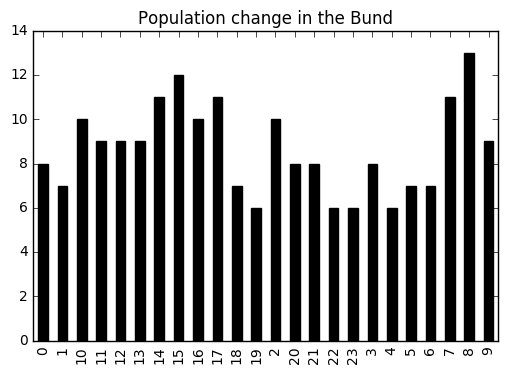

In [18]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data.plot(kind='bar', color='k')
ax.set_title('Population change in the Bund')

In [26]:
#data_user0 = pd.merge(data_location0,data_interest, how='outer', left_index=True, right_index=True)
data_user8 = pd.merge(data_location8,data_interest, on='IMEI')
data_user8

,date,IMEI,Longitude,latitude,bankSMSNum,motorVehiclesAPPNum,financialAPPNum,stockAPPNum,ContactsCircleSize,cross-regionalBehavior,...,travlSitesNum,sportsSitesNum,motorVehicleSitsNum,newsSitsNum,socialSitsNum,entertainmentSitsNum,recruitSitsNum,educationSitsNum,otherSitsNum,webgameSitsNum
0,20160102,2ab41bf4da442c8b2f3306c28d15d919,121.604640,31.29501,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
1,20151231,2ab41bf4da442c8b2f3306c28d15d919,121.618529,31.26382,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
2,20160101,2ab41bf4da442c8b2f3306c28d15d919,121.614610,31.25936,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
3,20160103,2ab41bf4da442c8b2f3306c28d15d919,NaN,NaN,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
4,20160104,2ab41bf4da442c8b2f3306c28d15d919,NaN,NaN,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
5,20160106,2ab41bf4da442c8b2f3306c28d15d919,NaN,NaN,0,0,0,0,180,是,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,20160102,805f3b8e9c6184f4b134c5e9a3fc8afd,121.411670,31.21944,0,0,0,0,25,否,...,0,0,0,0,0,0,0,0,0,0
107,20160101,805f3b8e9c6184f4b134c5e9a3fc8afd,NaN,NaN,0,0,0,0,25,否,...,0,0,0,0,0,0,0,0,0,0
108,20151228,805f3b8e9c6184f4b134c5e9a3fc8afd,NaN,NaN,0,0,0,0,25,否,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_waitan8 = data_user8[(data_user8.Longitude > 121.500431) & (data_user8.Longitude < 121.553020) &
            (data_user8.latitude > 31.234144) & (data_user8.latitude < 31.279110) & (data_user8.date == 20151228) & (data_user8.ContactsCircleSize > 0)]
num_waitan8 = len(data_waitan8)
num_waitan8

1

In [23]:
data_month12 = pd.read_csv('unicom/201512.csv',encoding='gbk')
data_month12[:20]
names = ['month','IMEI','Netstop','sex','age','ARPU','telBrand','telModel','trafficUsage','voiceCallduration','smsNum']
data_month12.columns = names

In [27]:
data_user8_month12 = pd.merge(data_user8,data_month12, on='IMEI')
data_user8

,date,IMEI,Longitude,latitude,bankSMSNum,motorVehiclesAPPNum,financialAPPNum,stockAPPNum,ContactsCircleSize,cross-regionalBehavior,...,month,Netstop,sex,age,ARPU,telBrand,telModel,trafficUsage,voiceCallduration,smsNum
